<a href="https://colab.research.google.com/gist/bruAristimunha/351cf17d387f03078981f8b45e720872/jupyter_paper_re-deep-convolution-neural-network-and-autoencoders-based-unsupervised-feature-learning-of-eeg-signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. [Re] [Deep Convolution Neural Network and Autoencoders-Based Unsupervised Feature Learning of EEG Signals](https://doi.org/10.1109/ACCESS.2018.2833746)

## 1.1 Reproduction authors.

We have no affiliation with the original authors and our attempts to contact them have failed.

[Bruno Aristimunha](https://github.com/bruAristimunha)*<sup>1</sup>, [Diogo Eduardo Lima Alves](https://github.com/DiogoEduardo)*<sup>1</sup>, [Walter Hugo Lopez Pinaya](https://github.com/warvito) <sup>1,2</sup>, [Raphael Y. de Camargo](https://rycamargo.wixsite.com) <sup>1</sup>

> <sup>1</sup> Center for Mathematics, Computation and Cognition (CMCC), Federal Univesity of ABC (UFABC), Rua Arcturus, 03. Jardim Antares, São Bernardo do Campo, CEP 09606-070, SP, Brazil.

> <sup>2</sup> Department of Psychosis Studies, Institute of Psychiatry, Psychology & Neuroscience, King’s College London, London, UK.

>*b.aristimunha@gmail.com, digmogle96@gmail.com

---

## 1.2 Original paper authors.

Tingxi Wen <sup>2</sup>, Zhongnan Zhang* <sup>2</sup>

> <sup>2</sup> Software School, Xiamen University, Xiamen, China.

*zhongnan_zhang@xmu.edu.cn

# 2. Abstract (text)

This paper presents our efforts to reproduce and improve the results achieved by the authors of the original article. We follow the steps and models described in their article and the same public data sets of EEG Signals. Epilepsy affects more than 65 million people globally, and EEG Signals are critical to analyze and recognize epilepsy. Although the efforts in the last years, it is still challenging to extract useful information from these signals and select useful features in a diagnostic application. We construct a deep convolution network and autoencoders-based model (AE-CDNN) in order to perform unsupervised feature learning. We use the AE-CDNN to extract the features of the available data sets, and then we use some common classifiers to classify the features. The results obtained demonstrate that the proposed AE-CDNN to outperforms the traditional feature extraction based classification techniques by achieving better accuracy of classification.

Keywords: Replication, Epilepsy, Auto-Enconder, EEG.

---

Responsible for the reproduction of the results: [Bruno Aristimunha](https://github.com/bruAristimunha) and [Diogo Eduardo Lima Alves](https://github.com/DiogoEduardo).

The goals in the work is:
  * Make a reproducible report of the results previously reported;

  * Improve and deepen the analyzes already carried out in the original article;



Advisors: [Walter Hugo Lopez Pinaya](https://github.com/warvito) and [Raphael Y. de Camargo](https://rycamargo.wixsite.com/home) 

***

This work follows the structure below: 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-[Re]-Deep-Convolution-Neural-Network-and-Autoencoders-Based-Unsupervised-Feature-Learning-of-EEG-Signals" data-toc-modified-id="1.-[Re]-Deep-Convolution-Neural-Network-and-Autoencoders-Based-Unsupervised-Feature-Learning-of-EEG-Signals-1">1. [Re] <a href="https://doi.org/10.1109/ACCESS.2018.2833746" target="_blank">Deep Convolution Neural Network and Autoencoders-Based Unsupervised Feature Learning of EEG Signals</a></a></span><ul class="toc-item"><li><span><a href="#1.1-Reproduction-authors." data-toc-modified-id="1.1-Reproduction-authors.-1.1">1.1 Reproduction authors.</a></span></li><li><span><a href="#1.2-Original-paper-authors." data-toc-modified-id="1.2-Original-paper-authors.-1.2">1.2 Original paper authors.</a></span></li></ul></li><li><span><a href="#2.-Abstract-(text)" data-toc-modified-id="2.-Abstract-(text)-2">2. Abstract (text)</a></span></li><li><span><a href="#3.-Imports-Packages-(code)" data-toc-modified-id="3.-Imports-Packages-(code)-3">3. Imports Packages (code)</a></span></li><li><span><a href="#4.-Introduction-(text):" data-toc-modified-id="4.-Introduction-(text):-4">4. Introduction (text):</a></span></li><li><span><a href="#5.-Related-Work-(text)-" data-toc-modified-id="5.-Related-Work-(text)--5">5. Related Work (text) <a name="related"></a></a></span></li><li><span><a href="#6.-Methodology-Proposal-(text-and-code)-" data-toc-modified-id="6.-Methodology-Proposal-(text-and-code)--6">6. Methodology Proposal (text and code) <a name="propose"></a></a></span><ul class="toc-item"><li><span><a href="#6.1-Implementation-Details-(text)" data-toc-modified-id="6.1-Implementation-Details-(text)-6.1">6.1 Implementation Details (text)</a></span></li><li><span><a href="#6.2-Autoencoders" data-toc-modified-id="6.2-Autoencoders-6.2">6.2 Autoencoders</a></span></li><li><span><a href="#6.3-Feature-Learning-Model" data-toc-modified-id="6.3-Feature-Learning-Model-6.3">6.3 Feature Learning Model</a></span></li><li><span><a href="#6.4-Classification" data-toc-modified-id="6.4-Classification-6.4">6.4 Classification</a></span></li></ul></li><li><span><a href="#7.-Experimental-Methodology-" data-toc-modified-id="7.-Experimental-Methodology--7">7. Experimental Methodology <a name="metho"></a></a></span><ul class="toc-item"><li><span><a href="#7.1-Bonn-University-EEG-database" data-toc-modified-id="7.1-Bonn-University-EEG-database-7.1">7.1 Bonn University EEG database</a></span></li><li><span><a href="#7.2-Children's-Hospital-of-Boston-EEG-database" data-toc-modified-id="7.2-Children's-Hospital-of-Boston-EEG-database-7.2">7.2 Children's Hospital of Boston EEG database</a></span></li><li><span><a href="#7.3-Performance-Measures" data-toc-modified-id="7.3-Performance-Measures-7.3">7.3 Performance Measures</a></span></li><li><span><a href="#7.4-Data-Management-(code)" data-toc-modified-id="7.4-Data-Management-(code)-7.4">7.4 Data Management (code)</a></span><ul class="toc-item"><li><span><a href="#7.4.1-Download-Data-(code)" data-toc-modified-id="7.4.1-Download-Data-(code)-7.4.1">7.4.1 Download Data (code)</a></span></li><li><span><a href="#7.4.3-Checking-the-Variance-(code)" data-toc-modified-id="7.4.3-Checking-the-Variance-(code)-7.4.2">7.4.3 Checking the Variance (code)</a></span></li><li><span><a href="#7.4.5-Load,-split-data-and-pre-processing-(code)" data-toc-modified-id="7.4.5-Load,-split-data-and-pre-processing-(code)-7.4.3">7.4.5 Load, split data and pre-processing (code)</a></span></li></ul></li><li><span><a href="#7.5-Performing-feature-learning-(code)" data-toc-modified-id="7.5-Performing-feature-learning-(code)-7.5">7.5 Performing feature learning (code)</a></span><ul class="toc-item"><li><span><a href="#7.5.1-Building-and-saving-dimension-reduction-(code)" data-toc-modified-id="7.5.1-Building-and-saving-dimension-reduction-(code)-7.5.1">7.5.1 Building and saving dimension reduction (code)</a></span></li></ul></li><li><span><a href="#7.6-Classification-process-(code)" data-toc-modified-id="7.6-Classification-process-(code)-7.6">7.6 Classification process (code)</a></span></li></ul></li><li><span><a href="#8.-Results-and-Discussion-" data-toc-modified-id="8.-Results-and-Discussion--8">8. Results and Discussion <a name="resu"></a></a></span><ul class="toc-item"><li><span><a href="#8.1.-Reproduction-of-the-values-reported-by-the-original-author." data-toc-modified-id="8.1.-Reproduction-of-the-values-reported-by-the-original-author.-8.1">8.1. Reproduction of the values reported by the original author.</a></span></li><li><span><a href="#8.2.-Extension-of-the-values-reported-by-the-original-author." data-toc-modified-id="8.2.-Extension-of-the-values-reported-by-the-original-author.-8.2">8.2. Extension of the values reported by the original author.</a></span><ul class="toc-item"><li><span><a href="#8.3.-Precision" data-toc-modified-id="8.3.-Precision-8.2.1">8.3. Precision</a></span></li><li><span><a href="#8.2.2-Specificity-and-Sensitivity" data-toc-modified-id="8.2.2-Specificity-and-Sensitivity-8.2.2">8.2.2 Specificity and Sensitivity</a></span></li><li><span><a href="#8.2.2-F-measure-and-ROC-AUC" data-toc-modified-id="8.2.2-F-measure-and-ROC-AUC-8.2.3">8.2.2 F-measure and ROC-AUC</a></span></li></ul></li></ul></li><li><span><a href="#9.-Conclusion-" data-toc-modified-id="9.-Conclusion--9">9. Conclusion <a name="concl"></a></a></span></li><li><span><a href="#References" data-toc-modified-id="References-10">References</a></span></li></ul></div>

# 3. Imports Packages (code)

In [1]:
colab = False

if colab:

    import os
    if os.path.exists("./ReScience-submission"):
        pass
    else: 
        !git clone --recurse-submodules -j8 -b Aristimunha-Alves-Pinaya-Camargo --single-branch https://github.com/bruAristimunha/ReScience-submission.git 
        !pip install -r ReScience-submission/requirements.txt

Imports packages which are used by jupyter paper.

In [2]:
import sys
sys.path.append("../code")
sys.path.append("../code/chb-mit/")

In [3]:
from data_management import (
    download_bonn,
    download_chbmit,
    get_original_results,
    load_dataset_boon,
    load_dataset_chbmit,
    preprocessing_split,
    read_history_model,
)

from variance import (
    get_variance_accumulated,
    get_variance_by_file,
    get_variance_by_person,)

from dimension_reduction import (
    build_feature,
    reduce_dimension,
)

from classification import (
    methods_classification,
    run_classification,
    save_classification,
)

from visualization import (
    boxplot_difference,
    plot_average_metric,
    plot_average_metric_baseline,
    plot_change_loss,
    plot_feature_distribution,
    plot_variance_accumulate,
    plot_variance_by_file,
    plot_variance_by_person,
    table_classification_dimension,
    table_classification_fold,
    table_export_latex,
)

Note: The FutureWarning is related to seaborn, this is nothing to worry about
[according to this issue](https://github.com/pandas-dev/pandas/issues/31682).

In [4]:
TEST_SIZE = 0.2
EPOCHS = 5000
BATCH = 256
PATH_BOON = "../data/boon/"
PATH_CHBMIT = "../data/chbmit/"
chbmit_url = "https://physionet.org/files/chbmit/1.0.0/"

path_original = "../data/original_results/"
n_dims = [2, 4, 8, 16, 32, 64, 128, 256]

path_figure = "../article/figure"
path_table = "../article/table"

name_reducers = ["mae", "maae", "mape", "pca", "srp"]

In [5]:
import matplotlib.pylab as plt
plt.style.use("seaborn")
plt.style.use("seaborn-poster")

In [6]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

CONFIG = ConfigProto()
CONFIG.gpu_options.allow_growth = True
SESSION = InteractiveSession(config=CONFIG)

Note: Given the implementation of the loss function, it is necessary to define that we will use the GPU via Session.

Note 2: If you want to get the results again, please run the following command. Otherwise, just run all the cells.

In [7]:
run_again = True

if run_again:
    # Results of analysis of variance
    ! rm -r "../data/chbmit/variance_accumulated"
    ! rm -r "../data/chbmit/variance_file"
    ! rm -r "../data/chbmit/variance_person"

    # Figure and Table in article
    ! rm -r $path_figure
    ! rm -r $path_table
    
    ! mkdir $path_figure
    ! mkdir $path_table

rm: cannot remove '../data/chbmit/variance_accumulated': No such file or directory
rm: cannot remove '../data/chbmit/variance_file': No such file or directory
rm: cannot remove '../data/chbmit/variance_person': No such file or directory


# 4. Introduction (text):

Epilepsy is a chronic neurological disorder, and it is becoming one of the most common neurological diseases in the world. Approximately $1\%$ of the world's population is affected by epilepsy representing more than 65 million people affected. This disorder is characterized by the occurrence of spontaneous convulsions due to the abnormal synchronous firing of the cortical neurons. This physical reaction can generate many problems for patients, including physical harm caused by the loss of consciousness, shame and discrimination.

Frequent seizures are dangerous conditions because, at the moment of disruption of the body can occur falls, fractures, burns, car accidents, and other serious physical injuries. Epilepsy can be defined as a permanent predisposition in the brain to cause epileptic seizures.

A person is diagnosed with epilepsy if they have two unprovoked seizures (or one unprovoked seizure with the likelihood of more) that were not caused by some known and reversible medical condition like alcohol withdrawal or extremely low blood sugar. Even when correctly diagnosed and treated, the epileptic patient still suffers side effects and sporadic seizures. The epileptic seizures can cause even irreversible damage to the brain, and then we can visualize the importance of analyzing epilepsy to improve the life quality and the medical treatments for these patients.

To confirm the diagnostic, epileptologists should usually visually inspect the long-term electroencephalograms (EEG) of the scalp. EEG is a measure of the voltage fluctuation generated by the ion current of neurons in the brain, which reflects the activity of the brain’s bio-electricity and may contain many physiological and disease information. 

After the discovery that during a patient's seizure the brain activity changes, the EEG has become the most common epilepsy diagnostic tool. Many studies have been made, and the general problem consists in acquiring methods to classify the patients' EEG signals efficiently. 

However, this costly task still presents several challenges for automatic crisis detection, among them: The scarce number of public data sets; The lack of standardization in seizure classification methodologies; The lack of standardization of data preprocessing; The cost of a specialist to label time intervals; The unbalance of the time series given the rare occurrence of the event; The difficulty of reproducing the works in the literature.

With this problem in hand, this paper reproduces the results obtained in <a id="ref-1" href="#cite-WenZha">Wen and Zhang 2018</a>, with public data labeled and preprocessed. In addition, we get new results by combining the proposal classifiers into a classifier by set voting, and we add new metrics.

The remainder of this paper is organized as follows: Section [5](#related) presents a few works related to the classification of epileptic seizures in EGG. Section [6](#propose) introduce the methodological proposal employed, and their differences with the work of  <a id="ref-2" href="#cite-WenZha">Wen and Zhang 2018</a>. Section [7](#metho) lists the experimental validation process using epilepsy datasets. Section [8](#resu) presents the corresponding results and analyzes our approach. Finally, conclusions were summarized in Section [9](#concl).


# 5. Related Work (text) <a name="related"></a>

Several papers use automated methods for detecting seizures. We can extract several discriminative characteristics of the signals, among them, we mention the autocorrelation, probability of synchronization, functional connectivity network properties, EEG morphology and the reconstructed powers of the time series. 

The oscillatory characteristics present in the time series of patients with epilepsy were extensively studied by temporal frequency analysis for classification (<a id="ref-3" href="#cite-saab2005system">Saab and Gotman 2005</a>, <a id="ref-4" href="#cite-kuhlmann2009seizure">Kuhlmann et al. 2009</a>, <a id="ref-5" href="#cite-shoeb2004patient">Shoeb et al. 2004</a>, <a id="ref-6" href="#cite-shoeb2011machine">Shoeb et al. 2011</a>). Using this technique, we mention the Discrete Wavelet Transform (DWT), which, despite requiring hand-designed parameters, it is the most used (<a id="ref-7" href="#cite-ullah2018automated">Ullah et al. 2018</a>).

There is no standard rule for manually label seizures in databases, which makes it difficult to compare the results of these methods. Besides the few papers that use the same sets, few are looking for the same task.

In <a id="ref-8" href="#cite-chua2011application">Chua et al. 2011</a>, it is used High Order Spectra (HOS) and spectrum-based energy resources for the automated detection of epilepsy. The proposed method yields good results when using Gaussian Mixture (GMM) for classification ($93.11\%$ and $88.78\%$). In <a id="ref-9" href="#cite-nicolaou2012detection">Nicolaou and Georgiou 2012</a>, we have that the authors extracted the entropy of the permutation of the signals, and employed these in an SVM for classification. The result of this methodology, acquired $93.55\%$ for our first database, in task A vs E.

Some researchers have applied Deep Belief Networks (DBNs) to the detection of seizures (<a id="ref-10" href="#cite-acharya2018deep">Acharya et al. 2018</a>). In the line of deep learning algorithms, Convolutional Neural Networks (CNNs) attract growing interest in the literature. In <a id="ref-11" href="#cite-hussein2018epileptic">Hussein et al. 2018</a>, they propose a CNN that learns based on the spectral information of each channel and a LSTM network with a single layer to classify the channels of the objects. 

<a id="ref-12" href="#cite-xun2016detecting">Xun et al. 2016</a> propose an approach unusual when decoding each window of possible interval as an ``EEG word`` from the `EEG` dictionary. They explore temporal knowledge by learning context information from EEG fragments (Context-EEG). The authors obtained a $22.93\%$ error rate in the control classification vs epileptic crisis using the second dataset present in <a id="ref-13" href="#cite-WenZha">Wen and Zhang, 2018</a>. 

<a id="ref-14" href="#cite-emami2019autoencoding">Emami et al. 2019</a> obtained $100\%$ sensitivity with a simpler methodology than our. For each channel, it builds a autoencoder and through the error of reconstruction is classified. The dataset was self and with no access available. <a id="ref-15" href="#cite-ullah2018automated">Ullah et al. 2018</a> propose a pyramidal model of one dimension for convolution (P-1D-CNN). The method obtains $99.1$ $\pm$ $0.9$ in our first dataset.

# 6. Methodology Proposal (text and code) <a name="propose"></a>

In this section, we describe implementation details, since the core here is the reproducible aspect of our reference article. We introduce the idea and implementation of autoencoder/feature learning and our version of the model in <a id="ref-16" href="#cite-WenZha">Wen and Zhang 2018</a>, explaining the differences we have made to the original model.

In our study, we keep the autoencoder and feature learning as proposed. However, in the classification, in addition to the individual classifiers, we also employ a large ensemble learning classifier, which decides by majority vote the object class.

## 6.1 Implementation Details (text)

We decided to reproduce the implementation described in the article using Keras (<a id="ref-17" href="#cite-chollet2018keras">Chollet et al. 2018</a>) and backend in TensorFlow (<a id="ref-18" href="#cite-tensorflow">Abadi et al. 2016</a>). Our repository includes the list of all the required libraries employed in acquiring the datasets and running the model (the original and the proposed one). According to the methodology proposed in <a id="ref-19" href="#cite-Fuente:2019">la Fuente and Aduviri 2019</a>, we store all the checkpoints for the trained models, for reproduction purposes. Besides that, the training logs can be visualized using TensorBoard tool.

Given the lack of information about implementation in the original paper, some assumptions or cuts are made: 

* The number of epoch in the auto-enconder is assumed to be $5000$; 
* The number of samples per batch size is assumed to be $256$; 
* A column of the first database is removed, there is disagreement in the literature on the total instances, $4097$ or $4096$. In the specific database we use there is $4097$. The removed attribute is at the endpoint of each object; 
* In the second dataset, considering the information gap, we use the channel reported by the author to train the AutoEncoder;
* The loss function presented in equation $12$ of the <a id="ref-20" href="#cite-WenZha">Wen and Zhang, 2018</a> was implemented and we also compared the result obtained with MAPE; 
* The value of the seeds selected in all classifiers, data splitting and elsewhere was $42$; 
* The train-validation ratio was $80\%-20\%$ to AutoEnconder, in classifiers we use cross-validation with 5 or 10-fold; 
* Given a sizing problem, we resized the values using the minmax method, before the classification process.
* The classifier presented in the final subsection (NN2) was not reproduced for lack of information; 

The experiments were performed using a CPU with Intel Core i7-5930K with 3.50 GHz and two GPUs: Nvidia Quadro K5200 and GeForce GTX 970. Some experiments were also run using Nvidia Titan X.


## 6.2 Autoencoders

The autoencoder implemented is a specific case of neural network structure. It is formed by three layers, the input layer, output layer and a hidden layer. The training is done to set the weights of hidden layer to force the input layer and output layer to be as close to each other as possible. Our features are extracted from the hidden layer, which reduces the dimension of data.

Therefore we have a	encoding process and a decoding process, and we obtain the hidden layer $h$ by applying the encoding function:

\begin{equation}
h = encoder(x) = g(W*x+b),
\end{equation}

where $W$ is the weight matrix between input layer and hidden layer. In the decoding function the hidden layer $h$ is the input and $y = decoder(h)$ as output, the function is defined as follows:

\begin{equation}
y = decoder(x) = g(W'*x + b'),
\end{equation}

where $W'$ is the weight matrix between hidden layer and output layer. Since we want input and output to be as close as possible, we have the object function for the model training process:

$$\min \sum |y^{(i)} - x^{(i)}|,$$

where $y^{(i)}$ is the output signal and $x^{(i)}$ is the input signal.

## 6.3 Feature Learning Model

In this subsection, we will omit equations and minor details (for complete information, see <a id="ref-21" href="#cite-Shoeb">Shoeb and Guttag 2010</a>, <a id="ref-22" href="#cite-emami2019autoencoding">Emami et al. 2019</a>). Since we have the dimension reduced by autoencoder we focus on the next challenge: how to obtain effective features from EEG signals.  The AE-CDNN implemented follows the steps:


    Encoder: sample input, convolution layer, down-sampling layer, reshape operation, full connection layer, and the feature coding.
    
    Decoder: feature coding as input, full connection layer, reshape operation, deconvolution layer, up-sampling layer and the reconstruction samples.

Basically, the convolution layer acts as our feature extractor. It performs many successive convolution calculations of the input data and the expectation is to maintain the main components of the input data. The pooling layer is a down-sampling method which reduces data dimension. It uses windows to slide and extract the feature maps. These intervals do not overlap each other, and with then we obtain the pooled feature maps. The feature sizes tested were $m \in \{2, 4, 8, 16, 32, 64, 128, 256\}$[<sup>1</sup>](#fn1 "footnote 1").



The convolution and pooling operations can be iterated multiple times. Reshape operation uses the pooled feature maps to construct a one-dimension vector and a full-connection layer to transform this one-dimension vector. 

Considering $x$ as the input and $y$ as the output, now we need to re-transform the one-dimension vector which will generate the $y$ output, recall we want to minimize the difference between $x$ and $y$ and we have the following equation to calculate loss Mean Absolute Error:

$$\text{Loss MAE}= \frac{1}{N} \sum_{i=1}^N |x^{(i)} - y^{(i)}| .$$


In addition, given the possible interpretations in the original text, we have also used/implemented two loss functions, namely Mean Absolute Percentage Error - MAPE and Mean Absolute Average Error - MAAE[<sup>2</sup>](#fn2 "footnote 2"), that are contained below:


$$\text{Loss MAPE}= \frac{1}{N} \sum_{i=1}^N \frac{|x^{(i)} - y^{(i)}|}{x^{(i)}} .$$

The difference between the loss functions is only in the fact that one takes in the denominator the value per $x^{(i)}$ and the other takes the average ${\bar x^{(i)}}$.

$$\text{Loss MAAE}= \frac{1}{N} \sum_{i=1}^N \frac{|x^{(i)} - y^{(i)}|}{{\bar x^{(i)}}} .$$

---

<sup>1. <span id="fn1"> Size $m = 256$ has not been tested in <a id="ref-23" href="#cite-WenZha">Wen and Zhang 2018</a>.</span></sup>

<sup>2. <span id="fn2"> The formula presented in the original article by <a id="ref-23" href="#cite-WenZha">Wen and Zhang 2018</a> differs from the MAPE formula, despite having similar intuitions. Thus, we chose to implement this loss equation, and we have not found its use elsewhere.</span></sup> 

## 6.4 Classification

Since we have extracted the features with reduced dimension, we use supervised learning models on these features in order to classify the EEG signals. We evaluate each classifier and then we compare the results obtained with each one. The classical classifiers used are: K-Nearest Neighbors (K-NN), Support-Vector Machine - Linear Kernel and Radial Basis kernel (SVM1, SVM2), Decision Tree (DT), Random Forest (RT), Multilayer Neural Network (MLP), Adaptive Boosting algorithm (ADB) and  Gaussian Naive Bayesian (GNB).
 
The proposed modification combines these classifiers and creates a single classifier that decides by voting. In short, the classifiers were combined by ensemble learning, and the result of the classification became the classification most voted by the classifiers.

---

# 7. Experimental Methodology <a name="metho"></a>

In this paper, as in our reference paper <a id="ref-24" href="#cite-WenZha">Wen and Zhang 2018</a>, we use unsupervised learning method in EEG signals in order to obtain useful features. This process is needed because the original data is high-dimensional. By using the auto-encoder, we can extract features with reduced dimension.

---
## 7.1 Bonn University EEG database

We can use different approaches to detect epileptic crisis. Then, to acquire a comparative measure, we verify our outputs using the method described in [6](#propose) and the original one showed in <a id="ref-25" href="#cite-WenZha">Wen and Zhang 2018</a>. This database is public and was published by <a id="ref-26" href="#cite-Andrzejak">G. Andrzejak et al. 2002</a>. The study groups were the control, inter-ictal and ictal distributed into five sets (denotated A-E). Each containing $100$ records of $23.6$ seconds duration and frequency of $173.6$ Hz on a single channel, with $12$-bit resolution. Each data segment has 4097 samples. These recordings underwent a pre-processing in which the signals had a band filter between $0.53$ to $40$ Hz. There was also the removal of artifacts such as muscle movements or flicker movements.

Using labels A, B, C, D and E for the subsets, we have that A and B contain records of 5 healthy volunteers. Set A corresponds to open-eye activity and subset B to closed-eye activity. The subsets C and D have signals during the absence (interictal epileptiform activity) of 5 epileptic patients. And E records the signals during epileptic patients' seizure (ictal intervals). According to <a id="ref-27" href="#cite-kamath2015analysis">Kamath 2015</a>, this dataset is a compilation of recordings under different conditions.

## 7.2 Children's Hospital of Boston EEG database

The second database, also public, contains the EEG signals from a Children\`s Hospital of Boston
<a id="ref-5" href="#cite-shoeb2004patient">Shoeb et al. 2004</a>. It was recorded by measuring the brain's electrical activity to obtain EEG signals by connecting multiple electrodes to the patients’ scalp. The data incorporates the EEG signals of 23 children with refractory epilepsy.

This database, built in partnership with the Massachusetts Institute of Technology (MIT), has $5$ men and $18$ women between $3$ and $22$ years. The frequency range was $256$ Hz with $16$ resolution bits. Most patients contain $ 23 $ channels and some with $24$ channels. In contrast to the first set of data, we have multiple channels here, then we need to select channels. The selection followed the methodology used in \cite{31}, which analyzes the variance of each patient, and after that, chooses the channel of greater variance to represent that individual. The channel reported by the authors was `FT9-FT10`.

In the data of the first ten patients, 200 windows of the same size of the control set were chosen from the epileptic patients we choose $200$, with size of $4096$, in the same way of the control group.

---

## 7.3 Performance Measures

According to <a id="ref-28" href="#cite-roy2019deep">Roy et al. 2019</a>, most of the state-of-the-art systems for epilepsy use the metrics defined below. The adaptation of these metrics for evaluating our system contributes to fair comparison with state-of-the-art systems. The definitions of these metrics are given in Table [1](#table1).


| **Acurracy**      | **Precision** | **Specificity** | **Sensitivity/Recall** | **F-Measure**                                                |
|:--------------------------:|:----------------------:|:------------------------:|:------------------------:|:---------------------------------------------------------------------:|
| $\frac{TP+TN}{(TP+TN+FP+FN)}$ | $\frac{TP}{TP+FP}$      | $\frac{TN}{TN+FP}$        | $\frac{TP}{FN+TP}$        | $\frac{2 * Pre * Sens}{Sens+Pre}$ |

> Table 1. Metrics and Definition use in our paper. Only the Acurracy was considered in <a id="ref-29" href="#cite-WenZha">Wen and Zhang 2018</a>. <a name="table1"></a>

where False Negatives - FN is the number of epileptic cases, which are predicted as control, True Positives - TP is the number of epileptic cases, which are predicted as epileptic, True Negative - TN is the number of control case that is predicted as control and False Positives - FP is the number of control cases that are identified as epileptic by the system. 

In addition, there was also the AUC-ROC (Area Under The Curve - Receiver Operating Characteristic) defined as the cumulative distribution function of the true positive rate vs the false-negative rate denoted by a threshold.

---
## 7.4 Data Management (code)

In this section, we describe the operation required to reproduce the results. So, here is the code for downloading, loading, sampling, and splitting the dataset.

### 7.4.1 Download Data (code)

The EEG data obtained from the experiment reported above  are required for reproduction. These files have $11$ Mb in Bonn University and $25$ Gb in Children's Hospital of Boston database. You do need them for all the analysis in the Jupyter Paper. 

*Bonn University database*

In [8]:
boon_path_child_fold = download_bonn(PATH_BOON)

Folder already exists
Subfolders already exist


*Children's Hospital of Boston EEG database*

By default, this github contains the second dataset. If you want to reproduce the sampling process, please delete the `as_dataset` folder in the chbmit folder.

In [9]:
chbmit_path_child_fold = download_chbmit(url_base=chbmit_url,
                                         path_save=PATH_CHBMIT)

Folder already exists
Use load_dataset_chbmit


-----------------------------

### 7.4.3 Checking the Variance (code) 

According to the original authors, the choice of the channel in the second dataset observed the variance present in the channels. For that, they followed the methodology:

> 1) calculate the variance of each channel in each sample, and select the channel with the maximum variance for each sample; 2) count these channels.

Thereby, we model the three scenarios for the interpretation of what is the sample defined by the author. In the first, we analyzed each recording file of the dataset as a sample, having an average length of $921600$ referring to the recorded $3600s$. In these files, we compute and list the electrode with more variance and discard the rest. We accumulate and count for all files.

In the second scenario, we understand that each sample is accumulated per person with all his recordings. So the variance was calculated in parallel in the files and combined for each person. For each person, we count the occurrence of the channel with more variance.


Finally, we calculate the cumulative variance across all people and all records.

---

**1º Scenario:**

For each file:
* We calculated the variance of this file;
* We order the values;
* We take the channel with more variance;

In [10]:
variance_by_file = get_variance_by_file(PATH_CHBMIT)

Loading the files to calculate variance.


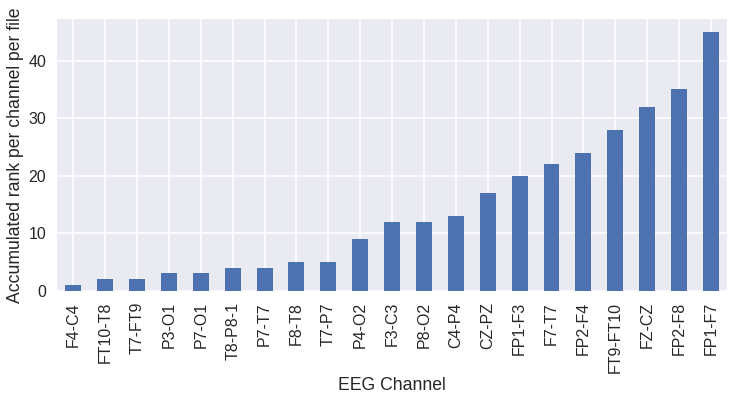

In [11]:
fig_by_file = plot_variance_by_file(variance_by_file)

plt.savefig("{}/variance_per_file.pdf".format(path_figure), 
            bbox_inches="tight", dpi=600)

The results obtained in the first scenario were not consistent with those reported by the author.

---

**2º Scenario:**

For each person:
* For each file:
    * We calculated the variance, size and the mean by channel;
    * We calculate the accumulated variance with the previous information, using the parallel variance calculation algorithm.
        
* We take the channel with more variance by person;

In [12]:
variance_per_person = get_variance_by_person(PATH_CHBMIT, 
                                             range_= (1,11))

Loading the files to calculate variance.


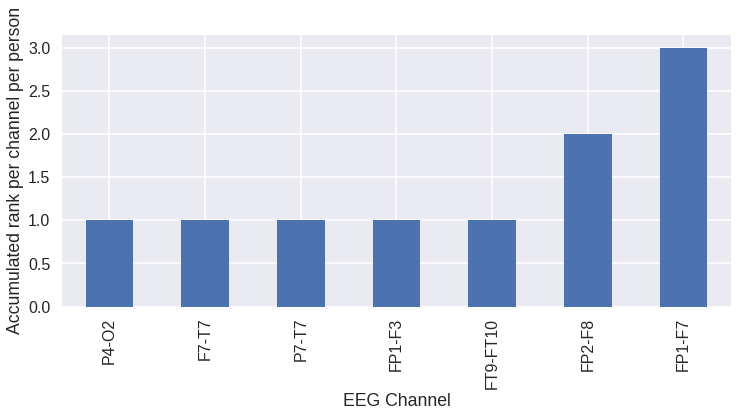

In [13]:
fig_by_person = plot_variance_by_person(variance_per_person)
plt.savefig("{}/variance_per_person.pdf".format(path_figure),
            bbox_inches="tight", dpi=600)

The results obtained in the second scenario were not consistent with those reported by the author.

---

**3º Scenario:**

* For each person:
    * For each file:
        * We calculated the variance, size and the mean by channel;
        * We calculate the accumulated variance with the previous information, using the parallel variance calculation algorithm;
    * We take the channel with more variance by person;
* We propagate and accumulate the variance for all samples;


In [14]:
accumulate_var = get_variance_accumulated(PATH_CHBMIT, range_= (1,11))

Loading the files to calculate variance.


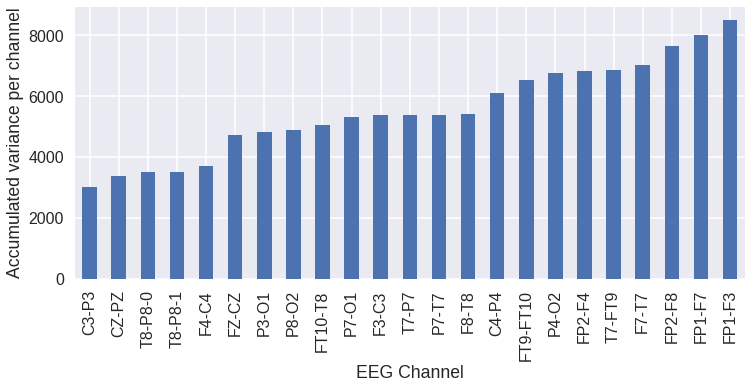

In [15]:
fig_accumulate = plot_variance_accumulate(accumulate_var)
plt.savefig("{}/variance_all.pdf".format(path_figure), 
            bbox_inches="tight", dpi=600)

The results obtained in the three scenario were not consistent with those reported by the author. Thus, not in any of the scenarios analyzed did we obtain the same results in the variance as the original authors.

---


There is still another possible scenario, however, not reproducible, being the possibility that the authors randomly sampled the dataset and in this they verified the variance.

### 7.4.5 Load, split data and pre-processing (code)

*Bonn University EEG database*


In [16]:
X_boon, y_boon = load_dataset_boon(PATH_BOON)

In [17]:
X_train_boon, X_test_boon, Y_train_boon, Y_test_boon = preprocessing_split(X_boon, y_boon,
                                                                           test_size=TEST_SIZE,
                                                                           random_state=42)

*Children's Hospital of Boston EEG database*

By default, this github contains the second dataset. If you want to reproduce the sampling process, please delete the `as_dataset` folder in the chbmit folder.

In [18]:
X_chbmit, y_chbmit = load_dataset_chbmit(PATH_CHBMIT)

Reading as dataframe


In [19]:
X_train_chbmit, X_test_chbmit, Y_train_chbmit, Y_test_chbmit = preprocessing_split(X_chbmit, y_chbmit,
                                                                                   test_size=TEST_SIZE,
                                                                                   random_state=42)

## 7.5 Performing feature learning (code)

In this section we present the dimension reduction process.

### 7.5.1 Building and saving dimension reduction (code)

In this sub-section has the dimension reduction process, in each dataset, either through methods baseline with Principal Component Analysis (`PCA`), Sparse Random Projection (`SRP`), or the proposal with Auto Encoder (`AE`).

*Bonn University EEG database*

__Auto Encoder (`AE`)__

* Mean absolute error (`MAE`)
* Mean absolute average error (`MAAE`)
* Mean absolute percentage error (`MAPE`)

In [ ]:
methods_ae_maae_boon = [[
    build_feature(X_train_boon, X_test_boon,
                  Y_train_boon, Y_test_boon,
                  PATH_BOON, EPOCHS, BATCH, type_loss, dim)
    for dim in n_dims]
    for type_loss in ["mae", "maae", "mape"]]

Convert and save with value enconding dimension: mae - 2
Convert and save with value enconding dimension: mae - 4
Convert and save with value enconding dimension: mae - 8


__Principal Component Analysis (`PCA`)__

In [ ]:
methods_pca_boon = [
    reduce_dimension(X_boon, y_boon,
                     PATH_BOON, "pca", dim)
    for dim in n_dims]

__Sparse Random Projection (`SRP`)__

In [ ]:
methods_srp_boon = [
    reduce_dimension(X_boon, y_boon,
                     PATH_BOON, "srp", dim)
    for dim in n_dims]

*Children's Hospital of Boston EEG database*

__Auto Encoder (`AE`)__

* Mean absolute error (`MAE`)
* Mean absolute average error (`MAAE`)
* Mean absolute percentage error (`MAPE`)

In [ ]:
methods_ae_mae_chbmit = [[
    build_feature(X_train_chbmit, X_test_chbmit,
                  Y_train_chbmit, Y_test_chbmit,
                  PATH_CHBMIT, EPOCHS, BATCH, type_loss, dim)
    for dim in n_dims]
    for type_loss in ["mae", "maae", "mape"]]

__Principal Component Analysis (`PCA`)__

In [ ]:
methods_pca_chbmit = [reduce_dimension(X_chbmit, y_chbmit,
                                       PATH_CHBMIT, "pca", dim)
                      for dim in n_dims]

__Sparse Random Projection (`SRP`)__

In [ ]:
methods_srp_chbmit = [
    reduce_dimension(X_chbmit, y_chbmit,
                     PATH_CHBMIT, "srp", dim)
    for dim in n_dims]

---
## 7.6 Classification process (code)  

*Bonn University EEG database*

In [ ]:
metrics_boon = [run_classification(path_dataset=PATH_BOON,
                                   name_type=name_type,
                                   range_values=n_dims)
                for name_type in name_reducers]

metrics_boon = dict(zip(name_reducers, metrics_boon))

*Children's Hospital of Boston EEG database*

In [ ]:
metrics_chbmit = [run_classification(path_dataset=PATH_CHBMIT,
                                     name_type=name_type,
                                     range_values=n_dims)
                  for name_type in name_reducers]

metrics_chbmit = dict(zip(name_reducers, metrics_chbmit))

---

# 8. Results and Discussion <a name="resu"></a>

In this section we analyze two analytical approaches, the first being a sub-section with the reproduction of all possible tables and figures, with a discussion of the reasons for the differences. In the second sub-section, we present an extension of the results, evaluating other classification metrics, proposing a new classifier and varying the classifier parameters.


## 8.1. Reproduction of the values reported by the original author.

The results obtained in our reproduction experiment are presented in Accuracy Tables [2](#table:accuracy-ae-l1-d1), [3](#table:accuracy-ae-l2-d1), [4](#table:accuracy-ae-l1-d2) and [5](#table:accuracy-ae-l2-d2). We employed the same methodology as the one used in the original paper, performing a 5-fold cross-validation for each classifier, and we show the mean values. For each table reproduced, we also present the original result and the difference between them.

In [ ]:
reprod_table_2, reprod_2_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_boon,
                                                    name_type="mae",
                                                    metric="accuracy",
                                                    name_dataset="boon",
                                                    original=True,
                                                    proposed=True)
reprod_2_style

In [ ]:
origin_table_2 = get_original_results(2, path_original)
origin_table_2.style.set_caption(
    "Original accuracy values, analysis of Table 2.")

In [ ]:
fig_diff_2 = boxplot_difference(reprod_table_2, origin_table_2)

plt.savefig("{}/table_2.pdf".format(path_figure),
            bbox_inches="tight",
            dpi=600)

> Table 2 and Figure 2: Classification Accuracy Results of AE-CDNN-MAE for Dataset 1<a name="table:accuracy-ae-l1-d1"></a>, Reproduced and Difference.
---

In [ ]:
reprod_table_3, reprod_3_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_boon, 
                                                    name_type="maae",
                                                    metric="accuracy", 
                                                    name_dataset="boon",
                                                    original=True, 
                                                    proposed=True)
reprod_3_style

In [ ]:
origin_table_3 = get_original_results(3, path_original)
origin_table_3.style.set_caption(
    "Original accuracy values, analysis of Table 3.")

In [ ]:
fig_diff_3 = boxplot_difference(reprod_table_3, origin_table_3)

plt.savefig("{}/table_3.pdf".format(path_figure), 
            bbox_inches="tight", 
            dpi=600)

> Table 3 and Figure 3: Classification Accuracy Results of AE-CDNN-L2 for Dataset 1<a name="table:accuracy-ae-l2-d1"></a>.

---

In [ ]:
reprod_table_4, reprod_4_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_chbmit, 
                                                    name_type="mae",
                                                    metric="accuracy", 
                                                    name_dataset="chbmit",
                                                    original=True, 
                                                    proposed=True)
reprod_4_style

In [ ]:
origin_table_4 = get_original_results(4, path_original)
origin_table_4.style.set_caption(
    "Original accuracy values, analysis of Table 4.")

In [ ]:
fig_diff_4 = boxplot_difference(reprod_table_4, origin_table_4)

plt.savefig("{}/table_4.pdf".format(path_figure), 
            bbox_inches="tight", 
            dpi=600)

> Table 4 and Figure 4: Classification Accuracy Results of AE-CDNN-MAE for Dataset 2<a name="table:accuracy-ae-l1-d2"></a>.
---

In [ ]:
reprod_table_5, reprod_5_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_chbmit, 
                                                    name_type="maae",
                                                    metric="accuracy", 
                                                    name_dataset="chbmit",
                                                    original=True, 
                                                    proposed=True)
reprod_5_style

In [ ]:
origin_table_5 = get_original_results(5, path_original)
origin_table_5.style.set_caption(
    "Original accuracy values, analysis of Table 5.")

In [ ]:
fig_box_5 = boxplot_difference(reprod_table_5, origin_table_5)

plt.savefig("{}/table_5.pdf".format(path_figure), 
            bbox_inches="tight", 
            dpi=600)

> Table 5 and Figure 5: Classification Accuracy Results of AE-CDNN-L2 for Dataset 2<a name="table:accuracy-ae-l2-d2"></a>.

---

Considering Dataset 2 and Tables [2](#table:accuracy-ae-l1-d1), [3](#table:accuracy-ae-l2-d1), [4](#table:accuracy-ae-l1-d2) and [5](#table:accuracy-ae-l2-d2) we acquired similar results when compared with the results obtained by the original authors (<a id="ref-33" href="#cite-WenZha">Wen and Zhang 2018</a>). In general, the original paper acquired a maximum accuracy greater than those obtained by our reproduction implementation, but the average and unique values per dimension are close in most cases considering both functions AE-CDNN-MAE and AE-CDNN-MAAE. However, for Dataset 1 the accuracy values obtained in this paper are significantly lower than the ones obtained by the original paper considering both AE-CDNN-MAE and AE-CDNN-MAAE.


In [ ]:
fig_avg_acc = plot_average_metric(metrics_boon["mae"], 
                                  metrics_boon["maae"],
                                  metrics_chbmit["mae"], 
                                  metrics_chbmit["maae"],
                                  names=["AE-CDNN-MAE", "AE-CDNN-MAAE"])

plt.savefig("{}/average-MAE-MAAE.pdf".format(path_figure), 
            bbox_inches="tight", dpi=600)

> Figure 6: Average Accuracy Results of AE-CDNN-MAE and AE-CDNN-MAAE, with different dimension values in the two dataset <a name="fig:average-cdnn"></a>.


As already shown in the Tables, the results obtained in the reproduction were similar. When analyzing the behavior of the different loss functions, we see that the `MAAE` function does not always obtain superior results than the` MAE` function. The same is observed in the original article, as well as a similar behavior, but the average accuracy obtained are significantly higher than those obtained by our reproduction.

When we analyze the loss function `MAAE` and` MAPE` we have that the behavior of both is not very divergent, being `MAAE` generating a higher accuracy in the first dataset. In the second dataset, `MAPE` has a more stable behavior and generates greater accuracy.

In [ ]:
fig_avg_acc = plot_average_metric(metrics_boon["maae"], 
                                  metrics_boon["mape"],
                                  metrics_chbmit["maae"], 
                                  metrics_chbmit["mape"],
                                  ["AE-CDNN-MAAE", "AE-CDNN-MAPE"])

plt.savefig("{}/average-MAAE-MAPE.pdf".format(path_figure), 
            bbox_inches="tight", dpi=600)

> Figure 6: Average Accuracy Results of AE-CDNN-MAAE and AE-CDNN-MAPE in the two dataset <a name="fig:average-cdnn-mape"></a>.


We observed in Tables [6](#table:accuracy-ae-l1-d1-fold) and [7](#table:accuracy-ae-l2-d1-fold) the result for the accuracy inspection, for the cross validation, for $m = 2$.


In [ ]:
boon_mae_2 = table_classification_fold(metrics_boon["mae"], dimension=2)

boon_mae_2.to_latex("{}/acc-mae-boon-fold-2.tex".format(path_table),
                    caption="Accuracy in Classification, with loss MAE"\
                    ", on each fold cross-validation, for Dataset 1.",
                    label="table:acc-mae-boon-fold-2")

> Table 6: Accuracy in Classification, with loss `MAE`, on each fold cross-validation, for Dataset 1<a name="table:accuracy-ae-l1-d1-fold"></a>.


In [ ]:
boon_maae_2 = table_classification_fold(metrics_boon["maae"], dimension=2)

boon_maae_2.to_latex("{}/acc-maae-boon-fold-2.tex".format(path_table),
                     caption="Accuracy in Classification, with loss MAAE"\
                     ", on each fold cross-validation, for Dataset 1.",
                     label="table:acc-maae-boon-fold-2")

> Table 7: Accuracy in Classification, with loss `MAAE`, on each fold cross-validation, for Dataset 1<a name="table:accuracy-ae-l2-d1-fold"></a>.


Analyzing the accuracy obtained by k-neighbors, svm linear, svm radial, decision tree, random forest, multi layer, ada boost and gaussian nb in Tables [6](#table:accuracy-ae-l1-d1-fold) and [7](#table:accuracy-ae-l2-d1-fold) we observe the values obtained by AE-CDNN-MAAE and AE-CDNN-MAE are close, however the function AE-CDNN-MAAE acquired smoothly better results and with less variation, in general. In the original paper we observe similar differences between the two functions, the results for AE-CDNN-MAAE are smoothly better for most classifiers, but considering gaussian_np, for example, the function AE-CDNN-L2 acquired much better results comparing with AE-CDNN-MAE. Although the results in original paper also have few variations for the classifiers svm linear, svm radial and multi layer we had no variance in these classifers for function AE-CDNN-MAAE.

In the second dataset, in Tables [8](#table:accuracy-ae-l1-d1-fold) and [9](#table:accuracy-ae-l2-d1-fold), when analyzing by fold we have that results are worse than those reported by the authors. However, the results is consistent with the hypothesis during the process, there was no feature learning. Also given the balance of this second set of data, we have that all methods do not present a better result than the random chance. 

In [ ]:
chbmit_mae_2 = table_classification_fold(metrics_chbmit["mae"], dimension=2)

chbmit_mae_2.to_latex("{}/acc-mae-chbmit-fold-2.tex".format(path_table),
                     caption="Accuracy in Classification, with loss MAE"\
                     ", on each fold cross-validation, for Dataset 2.",
                     label="table:acc-mae-chbmit-fold-2")

> Table 8: Accuracy in Classification, with loss `MAE`, on each fold cross-validation, for Dataset 2<a name="table:accuracy-ae-l1-d2-fold"></a>.


In [ ]:
chbmit_maae_2 = table_classification_fold(metrics_chbmit["maae"], dimension=2)

chbmit_maae_2.to_latex("{}/acc-maae-chbmit-fold-2.tex".format(path_table),
                       caption="Accuracy in Classification, with loss MAAE"\
                       ", on each fold cross-validation, for Dataset 2.",
                       label="table:acc-maae-chbmit-fold-2")

> Table 9: Accuracy in Classification, with loss `MAAE`, on each fold cross-validation, for Dataset 2<a name="table:accuracy-ae-l2-d2-fold"></a>.


When analyzing the reduced values by class, specifically with $m = 4$ we have $3$ of the $4$ attributes are $0$, in the best scenario, indicating that there was no learning to distinguish the behavior by class. This bad representation of latent space occurs regardless of the loss function.

In [ ]:
fig_feat_distri = plot_feature_distribution(PATH_BOON, 4,
                                            names=["AE-CDNN-MAE",
                                                   "AE-CDNN-MAAE"])

plt.savefig("{}/feature_distribution_4.pdf".format(path_figure),
            bbox_inches="tight", dpi=600)

> Figure 8: Feature Distribution of AE-CDNN-MAE and AE-CDNN-MAAE, with $m=4$, in the first dataset. <a name="fig:feature-"></a>

---

When we analyze the behavior of the loss functions at the epoch, in the first dataset, we have that these do not have a parallel with those reported by the original author. In addition, numerically in the second function `MAAE` the values also do not present an adequate dimension with that originally reported. Consequently, we also have an indication that in the `MAAE` function there was not an adequate generalization in the validation.

In [ ]:
history_mae_4 = read_history_model(PATH_BOON, "mae", 4)
history_maae_4 = read_history_model(PATH_BOON, "maae", 4)

fig_change_loss = plot_change_loss(history_mae_4, history_maae_4,
                                  ["AE-CDNN-MAE", "AE-CDNN-MAAE"])

plt.savefig("{}/change_loss_mae_maae.pdf".format(path_figure),
            bbox_inches="tight", dpi=600)

> Figure 9: Change of loss function of AE-CDNN-MAE and AE-CDNN-MAAE, in the first dataset, with $m=4$ <a name="fig:loss-change-4"></a>.

---

Even assuming that the author used the MAPE loss function, we still do not obtain an adequate result in loss at the epoch.

In [ ]:
history_mape_4 = read_history_model(PATH_BOON, "mape", 4)

fig_change_loss = plot_change_loss(history_mae_4, history_mape_4,
                                   names=["AE-CDNN-MAE", "AE-CDNN-MAPE"])

plt.savefig("{}/change_loss_mae_mape.pdf".format(path_figure),
            bbox_inches="tight", dpi=600)

> Figure 10: Change of loss function of AE-CDNN-MAE and AE-CDNN-MAPE, in the first dataset, with $m=4$ <a name="fig:loss-change-4"></a>.

---

These differences also occur in the establishment in the baseline methods, indicating that there is some cut in the training set that was not included in this modeling, given the lack of information in the article.

In [ ]:
fig_avg_acc_base = plot_average_metric_baseline(metrics_boon["mae"], 
                                                metrics_boon["mape"],
                                                metrics_boon["pca"], 
                                                metrics_boon["srp"],
                                                metrics_chbmit["mae"], 
                                                metrics_chbmit["mape"],
                                                metrics_chbmit["pca"], 
                                                metrics_chbmit["srp"],
                                                name=["AE-CDNN-MAE",
                                                      "AE-CDNN-MAAE",
                                                      "PCA", "SRP"])


plt.savefig("{}/baseline_methods.pdf".format(path_figure),
            bbox_inches="tight", dpi=600)

> Figure 11: Comparison of accuracy for different loss functions (`AE-CDNN-MAE`, `AE-CDNN-MAAE`), and also with baseline (`PCA`, `SRP`) <a name="fig:baseline"></a>.

---

In Figure [11](#fig:baseline) we observe similar average accuracy between `AE-CDNN-MAE`, `AE-CDNN-MAAE`, `PCA` and `SRP` for both datasets. The same is observed in the original article, as well as a similar behavior, but the average accuracy obtained for Dataset 1 are significantly higher than those obtained by our reproduction.

In [ ]:
metrics_boon_cv_10 = run_classification(path_dataset=PATH_BOON,
                                        name_type="mae",
                                        range_values=[16, 32],
                                        cross_values=10)

In [ ]:
acc_boon_10 = table_classification_dimension(metrics_boon_cv_10,
                                             metric="accuracy")


acc_boon_10.to_latex("{}/metrics_boon_cv_10.tex".format(path_table),
                     caption="Accuracy in Classification, "
                     "in the first dataset with $CV=10$.",
                     label="metrics_boon_cv_10")

When we analyze the result assuming a 10 fold, we have an increase in the accuracy values for the first dataset, however, still below that reported by the author.

## 8.2. Extension of the values reported by the original author.

By Tables bellow, we realize that one of the most precise and specific method was the Gaussian Naive Bayesian; however, when analyzing the behavior in the Sensitivity metric, we do not have a satisfactory result. This indicates that the method pinpoints true negatives rather than true positives. If treated from a medical field, this result is worrying. The cases that the method indicates are true positives; however, this method misses many cases.

We also analyze that we cannot consider Support Vector Machine (Linear and Radial) or Multi-Layer results with the lowest $m$. The result in specificity indicates that the method behaves unwanted, possibly indicating all values as true positives. This rule burdens the medical system because further detection of the seizure requires further investigation for a complete diagnosis of the disease.

By our method, we note that the three metrics indicate that a progression in the number of features generates an improvement in seizure detection. Similar behavior is observed in multi_layer, only for accuracy and sensitivity, in this case, a beneficial behavior for the application. No trend was observed in the other methods. The average of the methods does not exceed our Ensemble method in almost any scenario. 

### 8.3. Precision


In [ ]:
precision_mae_d1, pre_mae_d1_style = table_export_latex(path_save=path_table,
                                                        dataset=metrics_boon,
                                                        name_type="mae",
                                                        metric="precision",
                                                        name_dataset="boon",
                                                        original=False,
                                                        proposed=False)
pre_mae_d1_style

In [ ]:
precision_maae_d1, pre_maae_d1_style = table_export_latex(path_save=path_table,
                                                          dataset=metrics_boon,
                                                          name_type="maae",
                                                          metric="precision",
                                                          name_dataset="boon",
                                                          original=False,
                                                          proposed=False)
pre_maae_d1_style

In the first dataset, when we analyze the accuracy we have that the naive bayes Gaussian classifier presents a drop of ($ 40 \%, 23 \% $, for first and second loss respectively) if compared to the accuracy. The average difference, in precision minus accuracy, is $ 6 \% $, indicating that the precision metric achieves slightly higher results on average in the samples. The k_neighbors classifier is the classifier, in the first loss function, that has the least average difference in results, while the svm_linear method shows the same result for the second loss set. At the other end, we have the largest variation in both gaussian_nb data sets.

In [ ]:
precision_mae_d2, pre_mae_d2_style = table_export_latex(path_save=path_table,
                                                        dataset=metrics_chbmit,
                                                        name_type="mae",
                                                        metric="precision",
                                                        name_dataset="chbmit",
                                                        original=False,
                                                        proposed=False)
pre_mae_d2_style

In [ ]:
precision_maae_d2, pre_maae_d2_style = table_export_latex(path_save=path_table,
                                                          dataset=metrics_chbmit,
                                                          name_type="maae",
                                                          metric="precision",
                                                          name_dataset="chbmit",
                                                          original=False, 
                                                          proposed=False)
pre_maae_d2_style

Meanwhile, in the second set of data, generated by the two loss functions, the difference between precision and accuracy is greater in the smallest dimensions, while the values are more stable, and close to the accuracy values in the largest dimensions. Such stability behavior is also observed in the absolute values.

----


### 8.2.2 Specificity and Sensitivity

When we analyze the specificity, we have that the SVM method, with different kernels, cannot obtain a separation of the hyperspaces of the attributes to distinguish the non-schizoid events. In this way, we have that the classifier cannot distinguish when the person is without epileptic attack. From a medical point of view, there are not so many implications for this, since the weighting of importance is inclined to detect true positives. The SVM sensitivity for these cases, in high dimensions (above $ 32 $) presents reasonable values, approximately $ 70 \% $ in the worst scenarios. In general, the panorama of the accumulated sensitivity indicates that the worst classifiers, regardless of the number of dimensions, are the Gaussian naive bayes, and the k_neighbors for high dimensions. The ensemble classifier has average cumulative sensitivity ($ 71 \% $ in the worst case scenario), with the exception of lower case scenarios $ 2 $.

The performance of the Gaussian classifier may be related to the fact that the inputs are highly dependent on each other, thus violating the method's premise of independence. In the case of the k-neighbors classifier, given the presence of the values ​​$ 0 $ in various dimensions, as shown previously, which can affect the distance assumptions necessary for the method.

In [ ]:
spe_mae_d1, spe_mae_d1_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_boon,
                                                  name_type="mae",
                                                  metric="specificity",
                                                  name_dataset="boon",
                                                  original=False, 
                                                  proposed=False)
spe_mae_d1_style

In [ ]:
spe_maae_d1, spe_maae_d1_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_boon,
                                                    name_type="maae",
                                                    metric="specificity",
                                                    name_dataset="boon",
                                                    original=False, 
                                                    proposed=False)
spe_maae_d1_style

In [ ]:
spe_mae_d2, spe_mae_d2_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_chbmit,
                                                  name_type="mae",
                                                  metric="specificity",
                                                  name_dataset="boon",
                                                  original=False, 
                                                  proposed=False)
spe_mae_d2_style


In [ ]:
spe_maae_d2, spe_maae_d2_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_chbmit,
                                                    name_type="maae",
                                                    metric="specificity",
                                                    name_dataset="boon",
                                                    original=False, 
                                                    proposed=False)
spe_maae_d2_style

------------------

In [ ]:
sen_mae_d1, sen_mae_d1_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_boon,
                                                  name_type="mae",
                                                  metric="sensitivity",
                                                  name_dataset="boon",
                                                  original=False, 
                                                  proposed=False)
sen_mae_d1_style

In [ ]:
sen_maae_d1, sen_maae_d1_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_boon,
                                                    name_type="maae",
                                                    metric="sensitivity",
                                                    name_dataset="boon",
                                                    original=False, 
                                                    proposed=False)
sen_maae_d1_style

In [ ]:
sen_mae_d2, sen_mae_d2_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_chbmit,
                                                  name_type="mae",
                                                  metric="sensitivity",
                                                  name_dataset="chbmit",
                                                  original=False, 
                                                  proposed=False)
sen_mae_d2_style

In [ ]:
sen_maae_d2, sen_maae_d2_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_chbmit,
                                                    name_type="maae",
                                                    metric="sensitivity",
                                                    name_dataset="chbmit",
                                                    original=False, 
                                                    proposed=False)
sen_maae_d2_style

----

### 8.2.2 F-measure and ROC-AUC

When analyzing the behavior of the methods for the reason of the metrics of $ F-measure $ and $ ROC-AUC $ we have that in the first data set, the SVM and multi_layer methods present the best results. At the other end, we have the appearance with the naive bayes and $ k $ neighbor methods.

We analyze the behavior of the F-measure. The relationship between sensitivity and precision is captured by this measure, as the gaussian_nb, svm_linear, k_neighbors methods did not obtain good results, which is coherent with the accuracy result. The measures generally show close results with each other. 

In [ ]:
fmea_mae_d1, fmea_mae_d1_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_boon,
                                                  name_type="mae",
                                                  metric="f-measure",
                                                  name_dataset="boon",
                                                  original=False, 
                                                  proposed=False)
fmea_mae_d1_style

In [ ]:
fmea_maae_d1, fmea_maae_d1_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_boon,
                                                  name_type="maae",
                                                  metric="f-measure",
                                                  name_dataset="boon",
                                                  original=False, 
                                                  proposed=False)
fmea_maae_d1_style

In [ ]:
fmea_mae_d2, fmea_mae_d2_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_chbmit,
                                                  name_type="mae",
                                                  metric="f-measure",
                                                  name_dataset="chbmit",
                                                  original=False, 
                                                  proposed=False)
fmea_mae_d2_style

In [ ]:
fmea_maae_d2, fmea_maae_d2_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_chbmit,
                                                  name_type="maae",
                                                  metric="f-measure",
                                                  name_dataset="chbmit",
                                                  original=False, 
                                                  proposed=False)
fmea_maae_d2_style

----------

In [ ]:
roc_mae_d1, roc_mae_d1_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_boon,
                                                  name_type="mae",
                                                  metric="roc-auc",
                                                  name_dataset="boon",
                                                  original=False, 
                                                  proposed=False)
roc_mae_d1_style

In [ ]:
roc_maae_d1, roc_maae_d1_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_boon,
                                                    name_type="maae",
                                                    metric="roc-auc",
                                                    name_dataset="boon",
                                                    original=False, 
                                                    proposed=False)
roc_maae_d1_style

In [ ]:
roc_mae_d2, roc_mae_d2_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_chbmit,
                                                  name_type="mae",
                                                  metric="roc-auc",
                                                  name_dataset="chbmit",
                                                  original=False, 
                                                  proposed=False)
roc_mae_d2_style

In [ ]:
roc_maae_d2, roc_maae_d2_style = table_export_latex(path_save=path_table,
                                                  dataset=metrics_chbmit,
                                                  name_type="maae",
                                                  metric="roc-auc",
                                                  name_dataset="chbmit",
                                                  original=False, 
                                                  proposed=False)
roc_maae_d2_style


---

# 9. Conclusion <a name="concl"></a>

In this article, we re-implemented the approach proposed by <a id="ref-33" href="#cite-WenZha">Wen and Zhang 2018</a>, an investigation of the accurately tested feature sizes and proposed a new classifier. This classification approach, based on deep learning for detecting epileptic seizures using EGG had not been explored previously. We adopted a self-concealment that allows us to construct a smaller representation space. Among the variety of metrics, our method stands out according to the ROC curve. The proposed approach still needs further.

The original authors leave gaps that make it impossible to fully reproduce the results obtained. For example, the lack of information about the neural classifier used in the last sub-section. As well as the lack of information about the sampling process of the first and second data sets. In addition to providing an example, exact information about the number of times or batch size, the results obtained can be considered at most a replication.


The method is easily portable to other tasks and codes are a byproduct of this work. As future work, we can employ data augmentation that would allow the method to better learn the parameters adopted.



<!--bibtex 

@Article{WenZha:2018,
    author = {Wen, Tingxi and Zhang, Zhongnan},
    year = {2018},
    month = {05},
    pages = {1-1},
    title = {Deep Convolution Neural Network and Autoencoders-based Unsupervised Feature Learning of EEG Signals},
    volume = {PP},
    journal = {IEEE Access},
    doi = {10.1109/ACCESS.2018.2833746}
}

@Article{Shoeb,
 author = {Shoeb, Ali and Guttag, John},
 title = {Application of Machine Learning to Epileptic Seizure Detection},
 booktitle = {Proceedings of the 27th International Conference on International Conference on Machine Learning},
 series = {ICML'10},
 year = {2010},
 isbn = {978-1-60558-907-7},
 location = {Haifa, Israel},
 pages = {975--982},
 numpages = {8},
 url = {http://dl.acm.org/citation.cfm?id=3104322.3104446},
 acmid = {3104446},
 publisher = {Omnipress},
 address = {USA},
} 

@Article{tensorflow,
  title={Tensorflow: A system for large-scale machine learning},
  author={Abadi, Mart{\'\i}n and Barham, Paul and Chen, Jianmin and Chen, Zhifeng and Davis, Andy and Dean, Jeffrey and Devin, Matthieu and Ghemawat, Sanjay and Irving, Geoffrey and Isard, Michael and others},
  booktitle={12th $\{$USENIX$\}$ Symposium on Operating Systems Design and Implementation ($\{$OSDI$\}$ 16)},
  pages={265--283},
  year={2016}
}

@Article{how,
  title={How Complex is your classification problem? A survey on measuring classification complexity},
  author={Lorena, Ana C and Garcia, Lu{\'\i}s PF and Lehmann, Jens and Souto, Marcilio CP and Ho, Tin K},
  journal={arXiv preprint arXiv:1808.03591},
  year={2018}
}

@Article{andrzejak,
    author = {G. Andrzejak, Ralph and Lehnertz, Klaus and Mormann, Florian and Rieke, Christoph and David, Peter and Elger, Christian},
    year = {2002},
    month = {01},
    pages = {061907},
    title = {Indications of nonlinear deterministic and finite-dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state},
    volume = {64},
    journal = {Physical review. E, Statistical, nonlinear, and soft matter physics},
    doi = {10.1103/PhysRevE.64.061907}
}

@Article{kamath2015analysis,
  title={Analysis of EEG dynamics in epileptic patients and healthy subjects using Hilbert transform scatter plots},
  author={Kamath, Chandrakar},
  journal={Open Access Library Journal},
  volume={2},
  number={1},
  pages={1},
  year={2015},
  publisher={Scientific Research Publishing}
}


@Article{chollet2018keras,
  title={Keras: The python deep learning library},
  author={Chollet, Fran{\c{c}}ois and others},
  journal={Astrophysics Source Code Library},
  year={2018}
}

@Article{benavoli2017time,
  title={Time for a change: a tutorial for comparing multiple classifiers through Bayesian analysis},
  author={Benavoli, Alessio and Corani, Giorgio and Dem{\v{s}}ar, Janez and Zaffalon, Marco},
  journal={The Journal of Machine Learning Research},
  volume={18},
  number={1},
  pages={2653--2688},
  year={2017},
  publisher={JMLR. org}
}

@Article{Fuente:2019,
  author = {la Fuente, Alfredo De and Aduviri, Robert},
  title = {{[Re] Variational Sparse Coding}},
  journal = {ReScience C},
  year = {2019},
  month = may,
  volume = {5},
  number = {2},
  pages = {{\#2}},
  doi = {10.5281/zenodo.3161734},
  url = {https://zenodo.org/record/3161734/files/Article.pdf},
  code_url = {https://github.com/Alfo5123/Variational-Sparse-Coding},
  code_doi = {10.5281/zenodo.2657330},
  data_url = {},
  data_doi = {},
  review_url = {https://github.com/reproducibility-challenge/iclr_2019/pull/146},
  type = {Replication},
  language = {Python},
  domain = {Machine Learning},
  keywords = {generative models, variational autoencoders, sparse coding}
}


@Article{saab2005system,
  title={A system to detect the onset of epileptic seizures in scalp EEG},
  author={Saab, ME and Gotman, Jean},
  journal={Clinical Neurophysiology},
  volume={116},
  number={2},
  pages={427--442},
  year={2005},
  publisher={Elsevier}
}


@Article{kuhlmann2009seizure,
  title={Seizure detection using seizure probability estimation: Comparison of features used to detect seizures},
  author={Kuhlmann, Levin and Burkitt, Anthony N and Cook, Mark J and Fuller, Karen and Grayden, David B and Seiderer, Linda and Mareels, Iven MY},
  journal={Annals of biomedical engineering},
  volume={37},
  number={10},
  pages={2129--2145},
  year={2009},
  publisher={Springer}
}



@Article{shoeb2004patient,
  title={Patient-specific seizure onset detection},
  author={Shoeb, Ali and Edwards, Herman and Connolly, Jack and Bourgeois, Blaise and Treves, S Ted and Guttag, John},
  journal={Epilepsy \& Behavior},
  volume={5},
  number={4},
  pages={483--498},
  year={2004},
  publisher={Elsevier}
}



@Article{shoeb2011machine,
  title={A machine-learning algorithm for detecting seizure termination in scalp EEG},
  author={Shoeb, Ali and Kharbouch, Alaa and Soegaard, Jacqueline and Schachter, Steven and Guttag, John},
  journal={Epilepsy \& Behavior},
  volume={22},
  pages={S36--S43},
  year={2011},
  publisher={Elsevier}
}


@Article{ullah2018automated,
  title={An automated system for epilepsy detection using EEG brain signals based on deep learning approach},
  author={Ullah, Ihsan and Hussain, Muhammad and Aboalsamh, Hatim and others},
  journal={Expert Systems with Applications},
  volume={107},
  pages={61--71},
  year={2018},
  publisher={Elsevier}
}

@Article{chua2011application,
  title={Application of higher order spectra to identify epileptic EEG},
  author={Chua, Kuang Chua and Chandran, Vinod and Acharya, U Rajendra and Lim, Choo Min},
  journal={Journal of medical systems},
  volume={35},
  number={6},
  pages={1563--1571},
  year={2011},
  publisher={Springer}
}

@Article{nicolaou2012detection,
  title={Detection of epileptic electroencephalogram based on permutation entropy and support vector machines},
  author={Nicolaou, Nicoletta and Georgiou, Julius},
  journal={Expert Systems with Applications},
  volume={39},
  number={1},
  pages={202--209},
  year={2012},
  publisher={Elsevier}
}


@Article{xun2016detecting,
  title={Detecting epileptic seizures with electroencephalogram via a context-learning model},
  author={Xun, Guangxu and Jia, Xiaowei and Zhang, Aidong},
  journal={BMC medical informatics and decision making},
  volume={16},
  number={2},
  pages={70},
  year={2016},
  publisher={BioMed Central}
}

@Article{acharya2018deep,
  title={Deep convolutional neural network for the automated detection and diagnosis of seizure using EEG signals},
  author={Acharya, U Rajendra and Oh, Shu Lih and Hagiwara, Yuki and Tan, Jen Hong and Adeli, Hojjat},
  journal={Computers in biology and medicine},
  volume={100},
  pages={270--278},
  year={2018},
  publisher={Elsevier}
}


@Article{emami2019autoencoding,
  title={Autoencoding of long-term scalp electroencephalogram to detect epileptic seizure for diagnosis support system},
  author={Emami, Ali and Kunii, Naoto and Matsuo, Takeshi and Shinozaki, Takashi and Kawai, Kensuke and Takahashi, Hirokazu},
  journal={Computers in biology and medicine},
  year={2019},
  publisher={Elsevier}
}

@Article{hussein2018epileptic,
  title={Epileptic seizure detection: A deep learning approach},
  author={Hussein, Ramy and Palangi, Hamid and Ward, Rabab and Wang, Z Jane},
  journal={arXiv preprint arXiv:1803.09848},
  year={2018}
}

@Article{roy2019deep,
  title={Deep learning-based electroencephalography analysis: a systematic review},
  author={Roy, Yannick and Banville, Hubert and Albuquerque, Isabela and Gramfort, Alexandre and Falk, Tiago H and Faubert, Jocelyn},
  journal={Journal of neural engineering},
  year={2019},
  publisher={IOP Publishing}
}

-->


# References

<a id="cite-WenZha"/><sup><a href=#ref-1>[^]</a><a href=#ref-2>[^]</a><a href=#ref-13>[^]</a><a href=#ref-16>[^]</a><a href=#ref-20>[^]</a><a href=#ref-23>[^]</a><a href=#ref-24>[^]</a><a href=#ref-25>[^]</a><a href=#ref-29>[^]</a><a href=#ref-30>[^]</a><a href=#ref-33>[^]</a></sup>Wen, Tingxi and Zhang, Zhongnan. 2018. _Deep Convolution Neural Network and Autoencoders-based Unsupervised Feature Learning of EEG Signals_.

<a id="cite-saab2005system"/><sup><a href=#ref-3>[^]</a></sup>Saab, ME and Gotman, Jean. 2005. _A system to detect the onset of epileptic seizures in scalp EEG_.

<a id="cite-kuhlmann2009seizure"/><sup><a href=#ref-4>[^]</a></sup>Kuhlmann, Levin and Burkitt, Anthony N and Cook, Mark J and Fuller, Karen and Grayden, David B and Seiderer, Linda and Mareels, Iven MY. 2009. _Seizure detection using seizure probability estimation: Comparison of features used to detect seizures_.

<a id="cite-shoeb2004patient"/><sup><a href=#ref-5>[^]</a></sup>Shoeb, Ali and Edwards, Herman and Connolly, Jack and Bourgeois, Blaise and Treves, S Ted and Guttag, John. 2004. _Patient-specific seizure onset detection_.

<a id="cite-shoeb2011machine"/><sup><a href=#ref-6>[^]</a></sup>Shoeb, Ali and Kharbouch, Alaa and Soegaard, Jacqueline and Schachter, Steven and Guttag, John. 2011. _A machine-learning algorithm for detecting seizure termination in scalp EEG_.

<a id="cite-ullah2018automated"/><sup><a href=#ref-7>[^]</a><a href=#ref-15>[^]</a></sup>Ullah, Ihsan and Hussain, Muhammad and Aboalsamh, Hatim and others. 2018. _An automated system for epilepsy detection using EEG brain signals based on deep learning approach_.

<a id="cite-chua2011application"/><sup><a href=#ref-8>[^]</a></sup>Chua, Kuang Chua and Chandran, Vinod and Acharya, U Rajendra and Lim, Choo Min. 2011. _Application of higher order spectra to identify epileptic EEG_.

<a id="cite-nicolaou2012detection"/><sup><a href=#ref-9>[^]</a></sup>Nicolaou, Nicoletta and Georgiou, Julius. 2012. _Detection of epileptic electroencephalogram based on permutation entropy and support vector machines_.

<a id="cite-acharya2018deep"/><sup><a href=#ref-10>[^]</a></sup>Acharya, U Rajendra and Oh, Shu Lih and Hagiwara, Yuki and Tan, Jen Hong and Adeli, Hojjat. 2018. _Deep convolutional neural network for the automated detection and diagnosis of seizure using EEG signals_.

<a id="cite-hussein2018epileptic"/><sup><a href=#ref-11>[^]</a></sup>Hussein, Ramy and Palangi, Hamid and Ward, Rabab and Wang, Z Jane. 2018. _Epileptic seizure detection: A deep learning approach_.

<a id="cite-xun2016detecting"/><sup><a href=#ref-12>[^]</a></sup>Xun, Guangxu and Jia, Xiaowei and Zhang, Aidong. 2016. _Detecting epileptic seizures with electroencephalogram via a context-learning model_.

<a id="cite-emami2019autoencoding"/><sup><a href=#ref-14>[^]</a><a href=#ref-22>[^]</a></sup>Emami, Ali and Kunii, Naoto and Matsuo, Takeshi and Shinozaki, Takashi and Kawai, Kensuke and Takahashi, Hirokazu. 2019. _Autoencoding of long-term scalp electroencephalogram to detect epileptic seizure for diagnosis support system_.

<a id="cite-chollet2018keras"/><sup><a href=#ref-17>[^]</a></sup>Chollet, Françcois and others. 2018. _Keras: The python deep learning library_.

<a id="cite-tensorflow"/><sup><a href=#ref-18>[^]</a></sup>Abadi, Martín and Barham, Paul and Chen, Jianmin and Chen, Zhifeng and Davis, Andy and Dean, Jeffrey and Devin, Matthieu and Ghemawat, Sanjay and Irving, Geoffrey and Isard, Michael and others. undefined. _Tensorflow: A system for large-scale machine learning_.

<a id="cite-Fuente:2019"/><sup><a href=#ref-19>[^]</a></sup>la Fuente, Alfredo De and Aduviri, Robert. 2019. _[Re] Variational Sparse Coding_. [URL](https://zenodo.org/record/3161734/files/Article.pdf)

<a id="cite-Shoeb"/><sup><a href=#ref-21>[^]</a></sup>Shoeb, Ali and Guttag, John. 2010. _Application of Machine Learning to Epileptic Seizure Detection_. [URL](http://dl.acm.org/citation.cfm?id=3104322.3104446)

<a id="cite-Andrzejak"/><sup><a href=#ref-26>[^]</a></sup>G. Andrzejak, Ralph and Lehnertz, Klaus and Mormann, Florian and Rieke, Christoph and David, Peter and Elger, Christian. 2002. _Indications of nonlinear deterministic and finite-dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state_.

<a id="cite-kamath2015analysis"/><sup><a href=#ref-27>[^]</a></sup>Kamath, Chandrakar. 2015. _Analysis of EEG dynamics in epileptic patients and healthy subjects using Hilbert transform scatter plots_.

<a id="cite-roy2019deep"/><sup><a href=#ref-28>[^]</a></sup>Roy, Yannick and Banville, Hubert and Albuquerque, Isabela and Gramfort, Alexandre and Falk, Tiago H and Faubert, Jocelyn. 2019. _Deep learning-based electroencephalography analysis: a systematic review_.

<a id="cite-how"/><sup><a href=#ref-31>[^]</a></sup>Lorena, Ana C and Garcia, Luis PF and Lehmann, Jens and Souto, Marcilio CP and Ho, Tin K. 2018. _How Complex is your classification problem? A survey on measuring classification complexity_.

<a id="cite-benavoli2017time"/><sup><a href=#ref-32>[^]</a></sup>Benavoli, Alessio and Corani, Giorgio and Demsar, Janez and Zaffalon, Marco. 2017. _Time for a change: a tutorial for comparing multiple classifiers through Bayesian analysis_.

